# Data Science

<br>

### Kishor Murade - 112003091
### Pratik Sarode - 112003124
### Rushikesh Pngle- 112003113

## Twitter Sentiment Analysis 
##               for 
## Product Review

<br>

## Import Libraries

In [1]:
import snscrape.modules.twitter
import csv
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import datetime
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from scipy.stats import norm
import statistics
import re
import emoji
from textblob import TextBlob
import nltk 
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter
import sklearn
from sklearn.naive_bayes import MultinomialNB

### <br>

## Data Scraping

In [ ]:
header = ['id', 'username', 'content', 'date', 'like', 'reply', 'retweet']
fp = open('iPhone.csv', 'w', encoding='UTF8', newline='')
writer = csv.DictWriter(fp, fieldnames=header)
writer.writeheader()

limit = 15000

for i, tweet in enumerate(snscrape.modules.twitter.TwitterSearchScraper('#iphone11 since:2020-12-30 lang:en').get_items()):
    if i > limit:
        break
    writer.writerows([{'id': tweet.id,
                       'username': tweet.user.username,
                       'content': tweet.content, 
                       'date': tweet.date, 
                       'like': tweet.likeCount, 
                       'reply': tweet.replyCount, 
                       'retweet': tweet.retweetCount}])

<br>

## Importing data from csv file

In [2]:
df = pd.read_csv(r"./iPhone.csv")

<br>

## Datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19993 entries, 0 to 19992
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        19993 non-null  int64 
 1   username  19993 non-null  object
 2   content   19993 non-null  object
 3   date      19993 non-null  object
 4   like      19993 non-null  int64 
 5   reply     19993 non-null  int64 
 6   retweet   19993 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


<br>

## Display data

In [4]:
df.head(12)

,id,username,content,date,like,reply,retweet
0,1649023985798004736,YaD3v,Download #UTG pro to get all #video_games info...,2023-04-20 12:15:30+00:00,0,0,0
1,1648944166662209536,WuKiana1,Silicone mobile phone case 3D magnetic suction...,2023-04-20 06:58:19+00:00,0,0,0
2,1648918260946202624,yahakunbaru,wts want to sell jual murahhhh iphone 11 tosca...,2023-04-20 05:15:23+00:00,0,1,0
3,1648668628580016128,GeniusPhone_R,$10 Off an iPhone 11 (All Models) Lifetime Bat...,2023-04-19 12:43:26+00:00,0,0,0
4,1648661583072047105,YaD3v,Download #UTG pro to get all #video_games info...,2023-04-19 12:15:26+00:00,0,0,0
5,1648623627124854786,FonezworldAK,⭐ IPhone 11 64GB New only €479 ⭐\n💡NO FIX NO F...,2023-04-19 09:44:37+00:00,0,0,0
6,1648600538433351680,jakeyeology,UP UP UP #wts #ph #lfb #iPhone #iPhone11,2023-04-19 08:12:52+00:00,0,0,0
7,1648583621169512448,mattr,Birdman. \n\n#dublin #streetphotography #stree...,2023-04-19 07:05:39+00:00,5,0,0
8,1648579818085298177,WuKiana1,Electroplated mobile phone case with magnetic ...,2023-04-19 06:50:32+00:00,0,0,0
9,1648578989072719872,WuKiana1,Electroplated colorful mobile phone case.\n#iP...,2023-04-19 06:47:14+00:00,0,0,0


<br>

## Shape

In [5]:
df.shape

(19993, 7)

<br>

## Replace emoticons

In [6]:
content = df.content.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",content))
emos_count = []
for emo in emos:
    emos_count.append((content.count(emo), emo))
emos_count = sorted(emos_count,reverse=True)
print("The emoticons found in the data are:")
print(emos_count)
print()

#classify the emoticons as 'happy emoticons' and 'sad emoticons'
emos_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

emos_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

#function to replace emoticons with sentiment related
def emos_replace(text):
  text = text.split()
  for i in range(len(text)):
    if text[i] in emos_happy:
      text[i] = 'happy'
    elif text[i] in emos_sad:
      text[i] = 'sad'
  text = ' '.join(text)
  return text


The emoticons found in the data are:
[(24263, ':/'), (2258, ': '), (2250, 'X '), (1560, 'XS'), (1217, 'XR'), (455, 'xs'), (438, 'xr'), (185, 'Xs'), (114, ';)'), (112, 'Xr'), (100, 'XI'), (86, 'xD'), (85, 'XD'), (63, 'x3'), (59, 'XP'), (57, 'X3'), (53, ':)'), (38, ':-'), (19, '::'), (18, 'X,'), (13, ':D'), (9, 'X.'), (7, ':('), (2, 'X?'), (2, 'X:'), (1, ':-)'), (1, ':-(')]



<br>

## Function to delete single character

In [7]:
def del_singles(text):
  text = str(text)
  text = text.split()
  text_new=[]
  for word in text:
    if(len(word)>1):
      text_new.append(word)
  text_new = " ".join(text_new)
  return text_new

<br>

## Function to replace emoji

In [8]:
def replace_emoji(text):
    text = emoji.demojize(text)
    text = text.replace(":"," ")
    text = ' '.join(text.split())
    return text

<br>

## Function to clean data

In [10]:
def data_cleaning(text):

    #remove NON-ASCII characters
    text = re.sub('\\\\u[0-9A-Fa-f]{4}','', text)

    #mark emoticons as happy or sad
    text = emos_replace(text)
    
    #replace emojis with their meaning
    text = replace_emoji(text)

    # remove retweet 'RT' 
    text = re.sub('RT[\s]+', '', text)

    #remove the user mentions
    text = re.sub('@[A-Za-z0–9]+', '', text) 

    #remove numbers
    text = re.sub("[0-9]", "", text) 

    #Keeping only the word after the #
    text = re.sub('#', '', text)

    # remove usernames
    text = re.sub('@[^\s]+', '', text)
    text= re.sub(r"[-\.\n]", "",text)

    # remove links (URLs/ links)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)

    # remove punctuations
    text = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', text)

    # Removing HTML garbage
    text = re.sub(r"&\w+;", "",text)

    # replace repeated letters with only two occurences
    # heeeelllloooo => heelloo
    text = re.sub(r"(.)\1+", r"\1\1",text)

    #remove single letters 
    text = del_singles(text)
    
    text = text.lower()

    return text


<br>

## Store cleaned tweets in list

In [11]:
tweet = []
for i in df.content:
    tweet.append(data_cleaning(i))
    
for i in range(5):
    print(i+1,tweet[i],"\n")

1 download utg pro to get all videogames information you want available on ios for iphone and ipad apple iphone https tconjagk https tcovatsaz 

2 silicone mobile phone case magnetic suction design iphonecase positivephonecase phonecases iphone iphone iphonepro iphonemax iphone redheart like envelope comment speakinghead share https tcodzfetctrk 

3 wts want to sell jual murahh iphone tosca gb pemakaian cewe ex inter hb masi mulus fullset no hf all provider face id on true tone on dm for price roundpushpin dom bintaro tangerang selatan wts jual zonabu zonauang murah jualiphone iphone https tcovwhdrdpes 

4 off an iphone all models lifetime battery replacement geniuscpr iphone iphonerepair battery replacement phoneprotection https tcomjmamssf https tcoobxffysabt 

5 download utg pro to get all videogames information you want available on ios for iphone and ipad apple iphone https tcoztvtile https tcokgvglcdls 



<br>

## Sentiment from emoticons and emoji

Text(0, 0.5, 'Count')

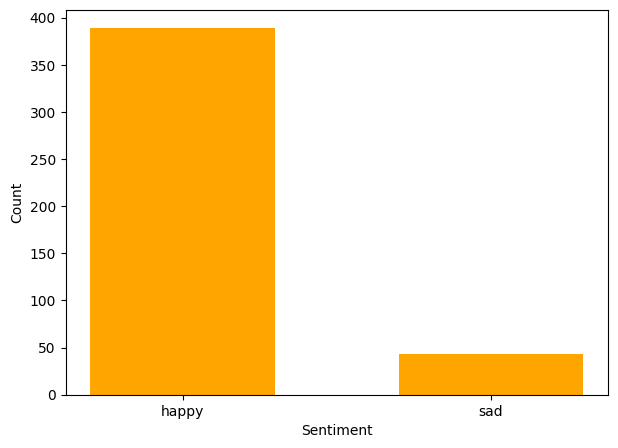

In [12]:
happy = 0
sad = 0

for i in tweet:
    if("happy" in i):
        happy = happy + 1
    if("sad" in i):
        sad += 1
data_dict = {'happy': happy, 'sad': sad}
sentiment = list(data_dict.keys())
values = list(data_dict.values())

fig = plt.figure(figsize = (7, 5))
plt.bar(sentiment, values, color ='orange',
        width = 0.6)
plt.xlabel("Sentiment")
plt.ylabel("Count")


<br>

## Tweets per year

Text(0, 0.5, 'Tweet Count')

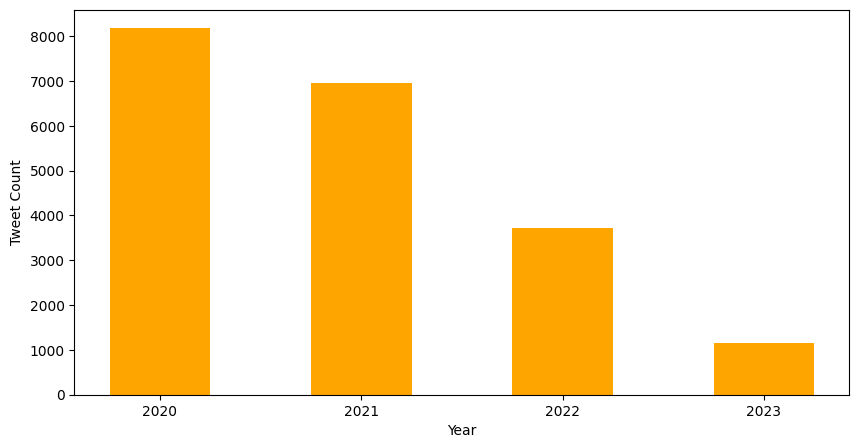

In [38]:
a = 0
b = 0
c = 0
d = 0
for i in df.date:
    
    if("2020" in str(i)):
        a += 1
        
    if("2021" in str(i)):
        b += 1
        
    if("2022" in str(i)):
        c += 1
        
    if("2023" in str(i)):
        d += 1
        
dates_dict = {'2020': a, '2021': b, '2022': c, '2023': d}
dates = list(dates_dict.keys())
values = list(dates_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(dates, values, color ='orange',
        width = 0.5)
plt.xlabel("Year")
plt.ylabel("Tweet Count")

<br>

## Correlation and heatmaps

In [39]:
df.corr()

/tmp/ipykernel_8659/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,like,reply,retweet
id,1.000000,-0.038927,0.003677,-0.039567
like,-0.038927,1.000000,0.399714,0.671599
reply,0.003677,0.399714,1.000000,0.261670
retweet,-0.039567,0.671599,0.261670,1.000000


/tmp/ipykernel_8659/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

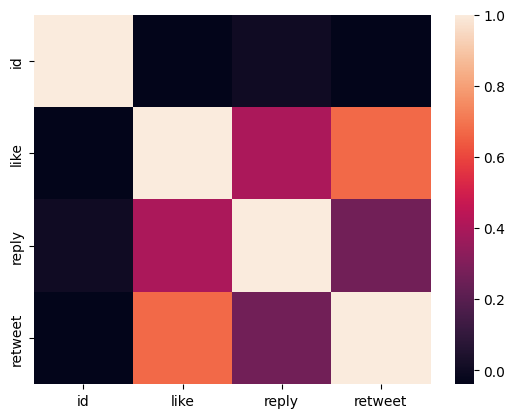

In [15]:
sns.heatmap(df.corr())

/tmp/ipykernel_8659/456078719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


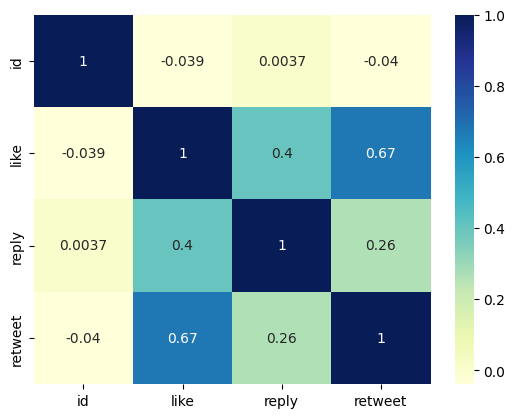

In [16]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<br>

## Pairplot

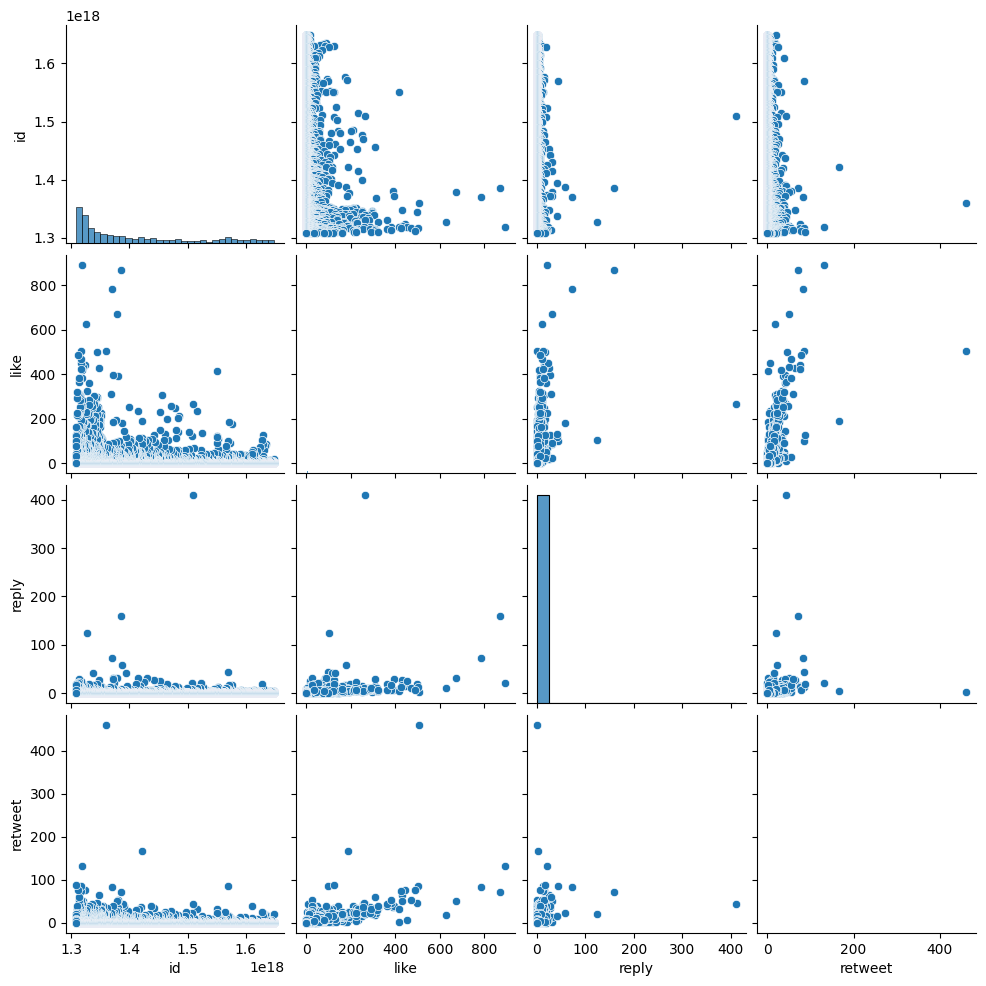

In [17]:
sns.pairplot(df)

<br>

## Replace tweet text with clean text in dataframe

In [18]:
pd.options.mode.chained_assignment = None
i = 0
for t in tweet:
    df.content[i] = t
    i = i + 1

<br>

## Classify sentiment of tweets

In [19]:
# classify sentiment of passed tweet using textblob's sentiment method
sentiment = []
for t in df.content:
    analysis = TextBlob(t)
    if(analysis.sentiment.polarity > 0):
        sentiment.append("Positive")
    elif(analysis.sentiment.polarity < 0):
        sentiment.append("Negative")
    else:
        sentiment.append("Neutral")

<br>

## Add sentiment column in dataframe

In [20]:
df['sentiment'] = sentiment

<br>

## Sentiment bar plot

Text(0.5, 1.0, 'Dataset labels distribuition')

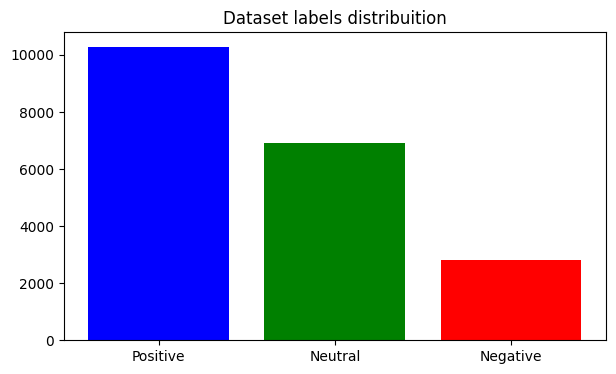

In [21]:
#plotting the bar plot
sentiment_cnt = Counter(df.sentiment)
plt.figure(figsize=(7,4))
plt.bar(sentiment_cnt.keys(),
        sentiment_cnt.values(),
        color=('b','g','r'))
plt.title("Dataset labels distribuition")

<br>

## Tokenize the tweet text

In [25]:
# creating a list of tokens
from nltk.tokenize import word_tokenize
token = []
for t in tweet:
    token.extend(word_tokenize(t))

<br>

## Building the model

In [26]:
x = tweet
y = df['sentiment'].values

# spliting the data for training and validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# print the length of train and test(validation) data
print("Train data: ", len(x_train))
print("Test data: ", len(x_test))

Train data:  13995
Test data:  5998


<br>

## Converting the strings into numeric data that the model would understand

In [27]:
# convert the string(tweets) data into numeric data which the SVM would understand
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

<br>

## Training the model ( SVM )

In [28]:
# Building a Support Vector Machine Model using TF-IDF approach
model_SVM = svm.SVC(C=0.98,kernel='linear')
model_SVM.fit(train_vectors, y_train)

SVC(C=0.98, kernel='linear')

<br>

## Testing

In [29]:
y_pred = model_SVM.predict(test_vectors)   
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("\nEVALUTION MATRIX\n\n",cm)
print("\n\n\nCLASSIFICATION MATRIX\n\n ",report)


EVALUTION MATRIX

 [[ 551  148  126]
 [  11 1933  144]
 [  76  153 2856]]



CLASSIFICATION MATRIX

                precision    recall  f1-score   support

    Negative       0.86      0.67      0.75       825
     Neutral       0.87      0.93      0.89      2088
    Positive       0.91      0.93      0.92      3085

    accuracy                           0.89      5998
   macro avg       0.88      0.84      0.86      5998
weighted avg       0.89      0.89      0.89      5998



<br>

## Accuracy

In [30]:
score_SVM = accuracy_score(y_test,y_pred)
print("Accuracy: ", score_SVM*100, " %")

Accuracy:  89.02967655885296  %


<br>

## Training the model ( Naive Bayes )

In [31]:
model_NB = MultinomialNB()
model_NB.fit(train_vectors, y_train)

MultinomialNB()

<br>

## Testing

In [32]:
y_pred = model_NB.predict(test_vectors)   
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("\nEVALUTION MATRIX\n\n",cm)
print("\n\n\nCLASSIFICATION MATRIX\n\n ",report)


EVALUTION MATRIX

 [[ 244   29  552]
 [   3  715 1370]
 [   2   53 3030]]



CLASSIFICATION MATRIX

                precision    recall  f1-score   support

    Negative       0.98      0.30      0.45       825
     Neutral       0.90      0.34      0.50      2088
    Positive       0.61      0.98      0.75      3085

    accuracy                           0.67      5998
   macro avg       0.83      0.54      0.57      5998
weighted avg       0.76      0.67      0.62      5998



<br>

## Accuracy

In [33]:
score_NB = accuracy_score(y_test,y_pred)
print("Accuracy: ", score_NB*100, " %")

Accuracy:  66.50550183394465  %


<br>

## Training the model ( Logistic Regression )

In [34]:
model_LR = sklearn.linear_model.LogisticRegression(penalty = "l1", C=0.1, solver="liblinear")
model_LR.fit(train_vectors, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

<br>

## Testing

In [35]:
y_pred = model_LR.predict(test_vectors)   
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("\nEVALUTION MATRIX\n\n",cm)
print("\n\n\nCLASSIFICATION MATRIX\n\n ",report)


EVALUTION MATRIX

 [[ 326  263  236]
 [   5 1697  386]
 [  36  602 2447]]



CLASSIFICATION MATRIX

                precision    recall  f1-score   support

    Negative       0.89      0.40      0.55       825
     Neutral       0.66      0.81      0.73      2088
    Positive       0.80      0.79      0.80      3085

    accuracy                           0.75      5998
   macro avg       0.78      0.67      0.69      5998
weighted avg       0.76      0.75      0.74      5998



<br>

## Accuracy

In [36]:
score_LR = accuracy_score(y_test,y_pred)
print("Accuracy: ", score_LR*100, " %")

Accuracy:  74.5248416138713  %


<br>

## Comparing accuracies

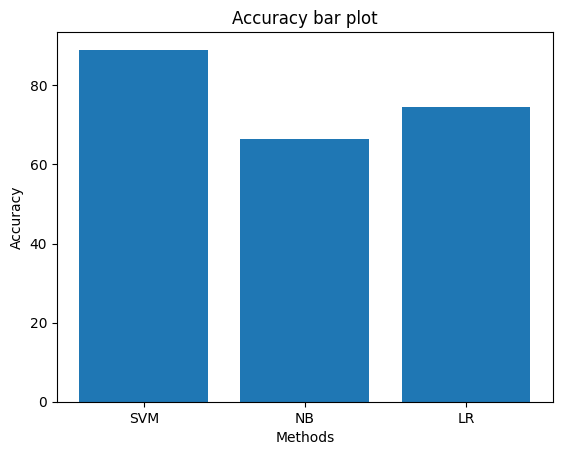

In [37]:
x = ['SVM', 'NB', 'LR']
y = [score_SVM*100, score_NB*100, score_LR*100]

plt.bar(x,y)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Accuracy bar plot')
plt.show()

### SVM ( Support vector machine ) algorithm got the highest accuracy